# Stop words를 사용하여 조금 더 robust한 프로그램 만들기

### 요구사항: stop-words가 들어간 단어를 제거해보고, 서로 비교해 보기


1. install packages() + library()  
```r
if(!require("")) {install.packages("")}
```
2. extract nouns except stopwords
```python
sub_interest<-rm_stopwords(interest, stopwords = tm::stopwords("english"))
sub_interest<-unlist(sub_interest)
```
3. namespace collision  
만약에 불러온 패키지 함수와 기존 함수의 이름이 동일하다면?  
이를 namespace collision이라고 한다.  
R은 내부적으로 가장 마지막에 호출한 library에서의 함수를 불러온다.  
ex)예를 들어 print()라는 함수가 example이라는 package안에 있다고 해보자
```R
print("hello world") #이때는 base에서의 print()
library(example)
print("hello example") #이때의 print()는 base의 print가 아니다.
```


In [38]:
rm(list=ls())
library(KoNLP) 
library(wordcloud)
library(Rfacebook)

#contrib01. pacman이라는 패키지를 추가합니다. install.packages() + library()
if (!require("pacman")) {install.packages("pacman")}
pacman::p_load_gh("trinker/qdap") #install wrapper for github

In [39]:
facebook_crawling <- function(token, page, output) {
  # ABC News 페이스북 데이터 수집
  facebookData <- getPage(page, token, n=100)
  # ABC News 뉴스피드 데이터를 파일에 저장
  write(facebookData$message, output)
}

In [40]:
# ABC News 페이지에서 데이터 수집
page <- "ABCNews" 		       # ABC News 페이지 ID
token <- "EAACEdEose0cBAOZB5tdmke2gtWUVPRE0eZCg8l1taGrrGRnIxvjX5JgupZBMjmzNE5EhVRMZBdAnDRcSPWWyIJZAdG7WmvDiLIwZClc3N2MXxSJ4G3DQu5D8ytWpUBYoctOCiVwvmCHIRQAtCShAdqJ0z5MybChwH5BO3YpSTVaxQUfvVB3uG8mF8v3ce5ohUZD"	# 페이스북 개발자 토큰
output <- "abcnews_fb_data.txt"	# 저장할 결과 파일 이름 

In [41]:
facebook_crawling(token, page, output)

25 posts 50 posts 75 posts 100 posts 

In [42]:
# 텍스트마이닝을 이용한 데이터 정제 및 분석

## 1) 페이스북 데이터 읽어오기
facebookPosts <- readLines(output)
## 2) NA 데이터 제거
facebookPosts <- facebookPosts[!is.na(facebookPosts)]
## 3) 명사 추출
facebookWords <- sapply(facebookPosts,extractNoun,USE.NAMES=F)
## 4) 특수문자, 숫자, 공백, 불필요한 단어 제거
interest<-gsub("[[:punct:][:digit:][:space:]]", "", unlist(facebookWords))

In [43]:
#contrib02-1 stopwords가 제외된 단어만을 추출합니다.
sub_interest<-rm_stopwords(interest, stopwords = tm::stopwords("english"))
sub_interest<-unlist(sub_interest)

In [60]:
#contrib02-2 stopwords들의 목록은 이하를 통해 볼 수 있습니다.
library(tm)
head(stopwords(kind = 'en'),10)
print(length(stopwords(kind='en')))#174개

[1] "i"         "me"        "my"        "myself"    "we"        "our"      
 [7] "ours"      "ourselves" "you"       "your"

[1] 174


In [47]:
# 5) 단어길이 3개 보다 큰 단어만 통과
#contrib03 namespace collision으로 인해 문제가 발생할 경우, 아래와 같이 수정합니다.
interest <- base::Filter(function(x){nchar(x)>3},interest)
sub_interest <- base::Filter(function(x) {nchar(x) > 3}, sub_interest)

In [55]:
# 6) 데이터 빈도 분석
sub_word_count <- table(sub_interest)
word_count <- table(interest)
head(sort(word_count, decreasing = T), 30)
head(sort(sub_word_count, decreasing = T), 30)

interest
      abcn      https       that       with       from     Friday     people 
        22         22         22         19         18         10         10 
      said       this      their      Trump     Donald       into  President 
        10         10          9          9          8          8          8 
     about       will  according      after      death government       help 
         7          7          6          6          6          6          6 
      over    through       week       when       year       been California 
         6          6          6          6          6          5          5 
     could       more 
         5          5 

sub_interest
      abcn      https     friday     people       said  president      trump 
        22         22         10         10         10          9          9 
    donald government     police       will  according      death       help 
         8          7          7          7          6          6          6 
      week       year california     school     across    alleged  announced 
         6          6          5          5          4          4          4 
     china    company    country      court      every      found       head 
         4          4          4          4          4          4          4 
      home   infected 
         4          4 

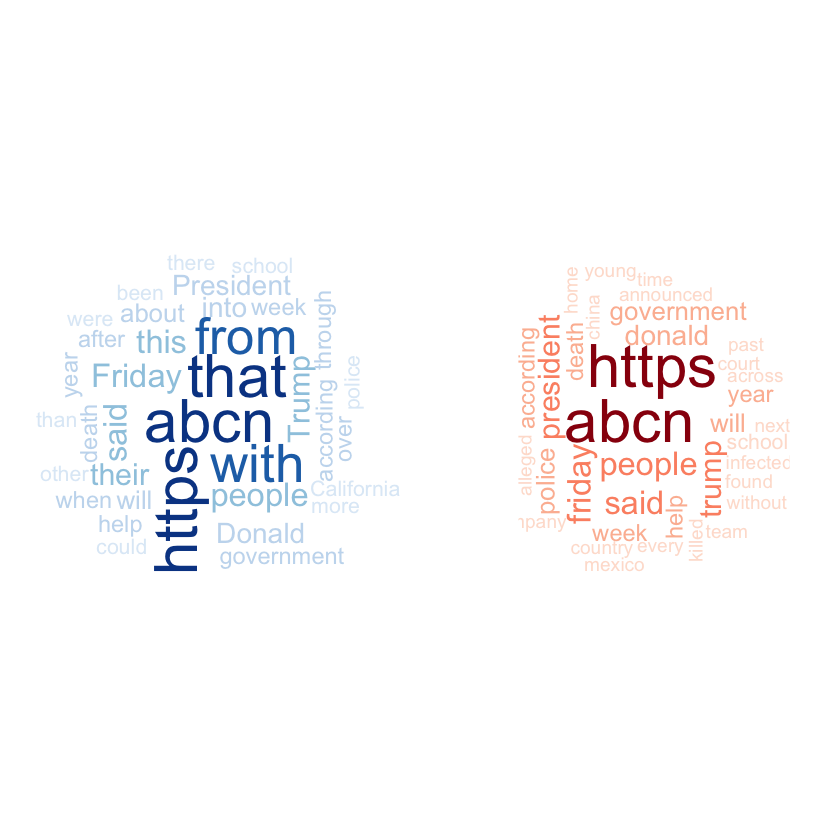

In [59]:
# 분석 결과 저장 및 시각화
write.table(sort(word_count, decreasing = T), file = "abcnews_interest.txt")
write.table(sort(sub_word_count, decreasing = T), file = "abcnews_interest_pruned.txt")

# [조건] 최소 빈도수 15 이상인 단어를 워드클라우드로 시각화
par(mfrow=c(1,2))
wordcloud(names(word_count),freq=word_count, scale=c(3,0.5),rot.per = 0.25,min.freq = 5, random.order = F, colors = brewer.pal(8, "Blues"))
wordcloud(names(sub_word_count), freq=sub_word_count, rot.per = 0.25, scale=c(3,0.5),min.freq = 4, random.order = F, colors = brewer.pal(8, "Reds"))